<a href="https://colab.research.google.com/github/JoelByron/AI_Camp_TalentoTech/blob/main/project/Metropolitan_Properties_Value_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. PLANTEAMIENTO DEL PROBLEMA**

Predecir el precio de venta (en UF o CLP) de una casa usada en la región metropolitana de Chile en función de sus características físicas y ubicación.

# **2. OBJETIVO**

Construir un modelo predictivo que estime el valor de una vivienda (en UF o CLP) basado en atributos como el número de habitaciones, número de baños, superficie total, superficie construida, número de estacionamientos, y la comuna donde se encuentra la propiedad.

# **3. VARIABLES DEL DATASET**


1.   **Comuna:** Nombre de la comuna (municipio) dentro de la región metropolitana de Chile donde se ubica la vivienda.
2.  **Enlace:**  Enlace al anuncio de la vivienda en el portal web.
3.  **Tipo_Vivienda:** Tipo de propiedad (por ejemplo, casa, departamento, etc.). Aunque en este conjunto de datos solo se incluyen casas.
4.  **N_Habitaciones:** Número de habitaciones disponibles en la vivienda.
5.  **N_Baños:** Número de baños que tiene la propiedad.
6.  **N_Estacionamientos :** Número de estacionamientos disponibles para la vivienda.
7.  **Total_Superficie_M2:** Superficie total del terreno de la propiedad, expresada en metros cuadrados.
8.  **Superficie_Construida_M2:** Superficie total del terreno de la propiedad, expresada en metros cuadrados.
9.  **Valor_UF:** Valor de la vivienda expresado en **UF** (Unidad de Fomento), una unidad monetaria utilizada en Chile que se ajusta por inflación.
10.  **Valor_CLP:** Valor de la vivienda expresado en **CLP** (pesos chilenos).
11.  **Dirección:** Dirección de la propiedad que incluye calle ya veces detalles adicionales.
12.  **Quién_vende:** Nombre de la persona (particular) o empresa que está vendiendo la propiedad.
13.  **Corredor:** Nombre de la inmobiliaria o corredor de propiedades que está a cargo de la venta.


# **4. IMPORTAR LIBRERIAS**

In [ ]:

# Importar las bibliotecas necesarias
import pandas as pd  # Manipulación de datos y estructuras de datos
import matplotlib.pyplot as plt  # Visualización de datos en gráficos
import seaborn as sns  # Visualización estadística basada en matplotlib
import numpy as np  # Operaciones numéricas y manipulación de matrices
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, cross_val_score, cross_val_predict, train_test_split  # Métodos de validación y búsqueda de hiperparámetros
from sklearn.neighbors import KNeighborsClassifier  # Clasificador K-vecinos más cercanos
from sklearn.preprocessing import StandardScaler  # Normalización de datos
from sklearn.pipeline import Pipeline  # Creación de flujos de trabajo para el procesamiento y modelado
from xgboost import XGBClassifier  # Clasificador XGBoost para optimización y rendimiento
from sklearn.ensemble import RandomForestClassifier  # Clasificador de bosque aleatorio
from sklearn.svm import SVC  # Clasificador de máquinas de soporte vectorial
from sklearn.feature_selection import SelectKBest, f_classif, RFECV  # Métodos de selección de características
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             classification_report, confusion_matrix, mean_squared_error,
                             r2_score, mean_absolute_error, mean_absolute_percentage_error)  # Métricas de evaluación del modelo
import warnings  # Manejo de advertencias
import statsmodels.api as sm  # Modelos estadísticos

In [ ]:
# Desactivar las alertas

warnings.filterwarnings('ignore')

# **5. IMPORTAR DATOS**

In [ ]:
# Importar el datasets
df_viviendas = pd.read_csv('/content/drive/MyDrive/data/Casas usadas - RM Mayo 2020.csv', encoding='latin-1',  delimiter=';')

In [ ]:
# Establecer la opción para mostrar todas las columnas en un DataFrame
pd.set_option('display.max_columns', None)

In [ ]:
# Visualizar las primeras filas del DataFrame df_mobile_market
df_viviendas.head()


,Comuna,Link,Tipo_Vivienda,N_Habitaciones,N_Baños,N_Estacionamientos,Total_Superficie_M2,Superficie_Construida_M2,Valor_UF,Valor_CLP,Dirección,Quién_Vende,Corredor
0,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,6.0,3,5000,440,12.2,351360000,"Calera de Tango, Queilen",Gabriela Mellado V.,Zenpro Propiedades
1,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,6.0,6.0,6,5000,430,13.0,374400000,"Calera de Tango, Queilen",Gabriela Mellado V.,Zenpro Propiedades
2,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,3.0,No,2027,140,10.3,296640000,"Calera de Tango, Avenida calera de tango con...",Alonso Baeza Rivera y Cía. Ltda. (Kennedy),Alonso Baeza Rivera y Cía. Ltda. (Kennedy)
3,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,8.0,6.0,No,5000,480,21.5,619200000,"Calera de Tango, Paradero 14 1/2/5 kilometros ...",RED Gestión Propiedades,Red Gestión Propiedades
4,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,2.0,3,5000,196,9.1,262080000,"Calera de Tango, Condominio El Trébol de Caler...",Gabriela Mellado V.,Zenpro Propiedades


# **6. ANÁLISIS DE DATOS EXPLORATORIO (EDA)**

In [ ]:
# Visualizar la información del DataFrame df_viviendas
df_viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Comuna                    1139 non-null   object 
 1   Link                      1139 non-null   object 
 2   Tipo_Vivienda             1139 non-null   object 
 3   N_Habitaciones            1131 non-null   float64
 4   N_Baños                   1118 non-null   float64
 5   N_Estacionamientos        1067 non-null   object 
 6   Total_Superficie_M2       1102 non-null   object 
 7   Superficie_Construida_M2  1103 non-null   object 
 8    Valor_UF                 1139 non-null   float64
 9   Valor_CLP                 1139 non-null   int64  
 10  Dirección                 1102 non-null   object 
 11  Quién_Vende               1139 non-null   object 
 12  Corredor                  1139 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 115.8+ KB


In [ ]:
# Convertir columnas a tipos numéricos
df_viviendas['N_Estacionamientos'] = pd.to_numeric(df_viviendas['N_Estacionamientos'], errors='coerce')
df_viviendas['Total_Superficie_M2'] = pd.to_numeric(df_viviendas['Total_Superficie_M2'], errors='coerce')
df_viviendas['Superficie_Construida_M2'] = pd.to_numeric(df_viviendas['Superficie_Construida_M2'], errors='coerce')


In [ ]:
# Eliminar filas con valores nulos
df_viviendas_clean = df_viviendas.dropna()

In [ ]:
# Crear un DataFrame para visualizar la cantidad y porcentaje de datos en blanco
datos_blanco = pd.DataFrame({
    'Registros en Blanco': df_viviendas_clean.isna().sum(),
    '% Registros en Blanco': df_viviendas_clean.isna().sum() / len(df_viviendas_clean) * 100  # Multiplicar por 100 para obtener el porcentaje
})

# Mostrar los datos en blanco
datos_blanco


,Registros en Blanco,% Registros en Blanco
Comuna,0,0.0
Link,0,0.0
Tipo_Vivienda,0,0.0
N_Habitaciones,0,0.0
N_Baños,0,0.0
N_Estacionamientos,0,0.0
Total_Superficie_M2,0,0.0
Superficie_Construida_M2,0,0.0
Valor_UF,0,0.0
Valor_CLP,0,0.0


In [ ]:
# Eliminar espacios
df_viviendas_clean.columns = df_viviendas_clean.columns.str.strip()

In [ ]:
#Visualizar los valores distintos de las variables categoricas del DataFrame df_mobile_market

# Seleccionar las variables categóricas del DataFrame df_viviendas
var_cat_viviendas = df_viviendas_clean[['Tipo_Vivienda', 'Comuna','Dirección','Corredor' ]]

# Calcular la frecuencia de los valores únicos en cada columna
unique_counts_viviendas = var_cat_viviendas.nunique()
unique_values_viviendas = var_cat_viviendas.apply(lambda x: x.unique())

# Crear un DataFrame para visualizar la frecuencia y los valores únicos
result_viviendas = pd.DataFrame({
    'Frequency': unique_counts_viviendas,
    'Unique Values': unique_values_viviendas
})

# Mostrar los datos de result_viviendas
result_viviendas

,Frequency,Unique Values
Tipo_Vivienda,1,[Casa]
Comuna,40,"[Calera de Tango, Cerrillos, Cerro Navia, Coli..."
Dirección,371,"[Calera de Tango, Queilen, Calera de Tango, Co..."
Corredor,87,"[Zenpro Propiedades, Vende Dueño/a, Johanna Ro..."


In [ ]:
# Visualizar la descripción estadística de las variables numéricas en df_viviendas

# Eliminar las columnas categóricas para quedarte solo con las variables numéricas
var_num_viviendas = df_viviendas_clean.drop(var_cat_viviendas.columns, axis=1)

# Calcular la descripción estadística de las variables numéricas
estadisticas_viviendas = var_num_viviendas.describe().T.round(1)

# Mostrar el resultado
estadisticas_viviendas

,count,mean,std,min,25%,50%,75%,max
N_Habitaciones,389.0,3.9,1.3,1.0,3.0,4.0,4.0,1.400000e+01
N_Baños,389.0,2.5,1.3,1.0,2.0,2.0,3.0,1.000000e+01
N_Estacionamientos,389.0,2.6,1.7,1.0,2.0,2.0,3.0,8.000000e+00
Total_Superficie_M2,389.0,690.6,1892.6,0.0,170.0,250.0,430.0,3.000000e+04
Superficie_Construida_M2,389.0,146.9,95.4,0.0,90.0,120.0,165.0,7.000000e+02
Valor_UF,389.0,6.9,6.0,1.2,3.1,5.2,8.0,3.690000e+01
Valor_CLP,389.0,199969673.6,173275689.0,35000000.0,90000000.0,150000000.0,230000000.0,1.062720e+09


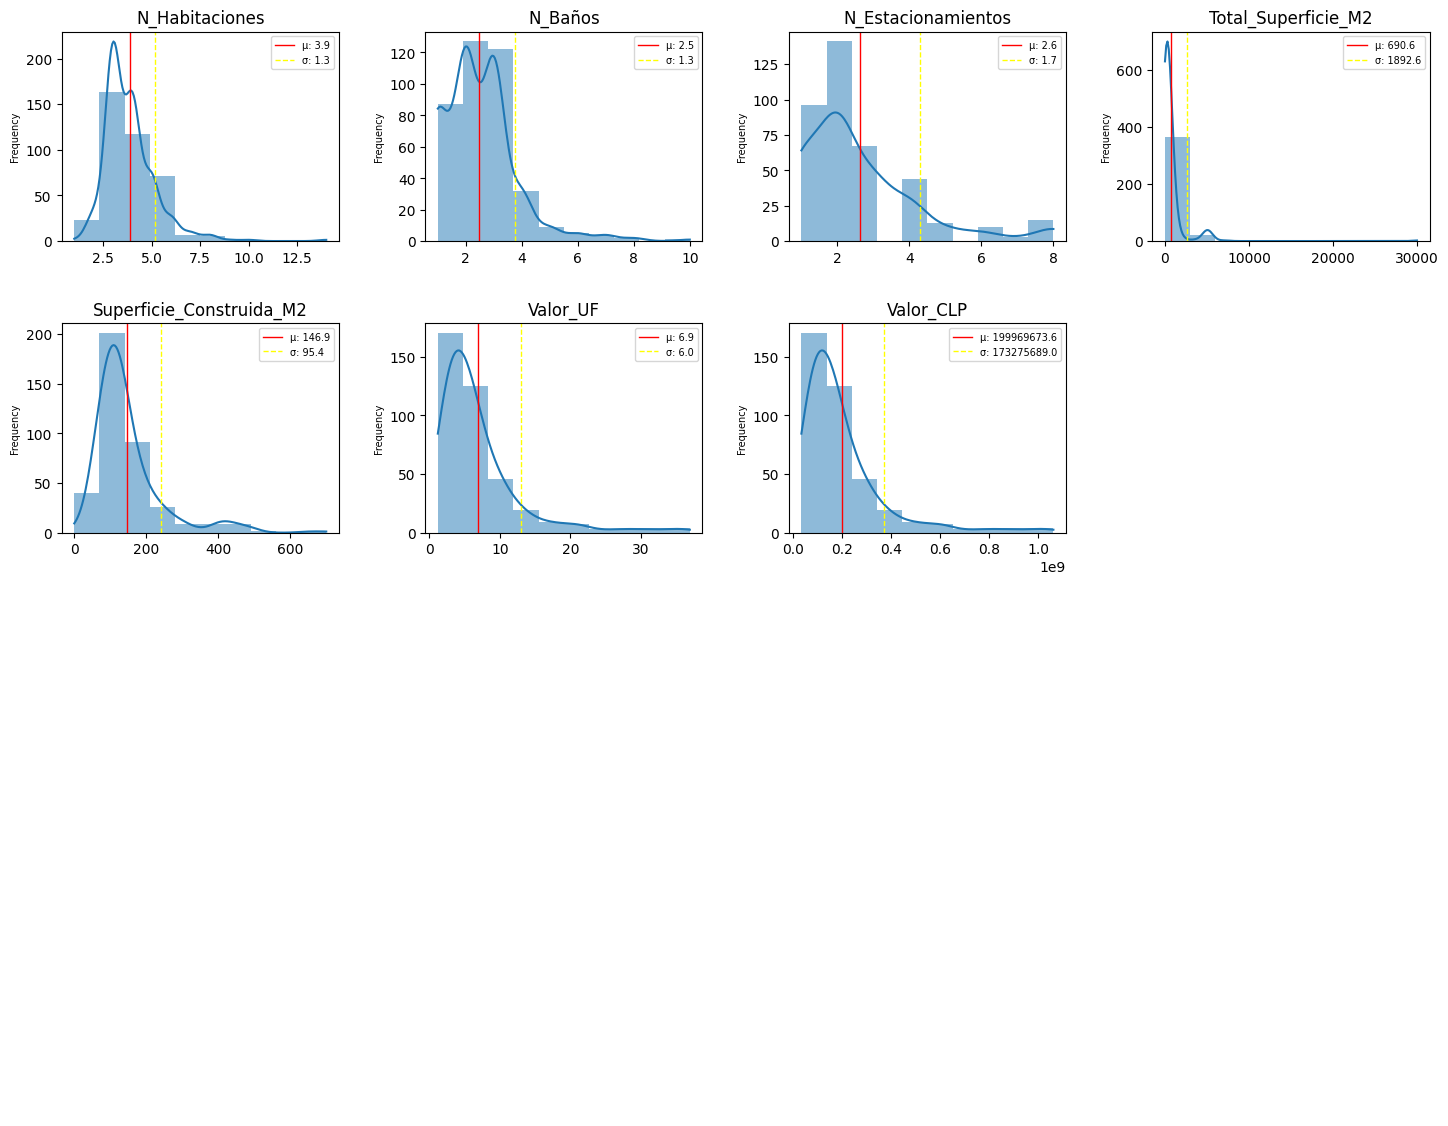

In [ ]:
# Seleccionar las columnas numéricas del DataFrame
var_num_viviendas = df_viviendas_clean[['N_Habitaciones', 'N_Baños', 'N_Estacionamientos', 'Total_Superficie_M2', 'Superficie_Construida_M2', 'Valor_UF', 'Valor_CLP']]

# Obtener la lista de columnas numéricas
columns = var_num_viviendas.columns.tolist()

# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 12))

# Recorrer las variables y graficar
for i, variable in enumerate(columns):
    row = i // 4
    col = i % 4

    # Crear el histograma con seaborn
    sns.histplot(var_num_viviendas[variable], bins=10, edgecolor=None, kde=True, ax=axes[row, col])

    # Calcular la media y la desviación estándar
    mean_value = var_num_viviendas[variable].mean()
    std_dev = var_num_viviendas[variable].std()

    # Añadir líneas de media y desviación estándar
    axes[row, col].axvline(mean_value, color='red', linewidth=1, label=f'µ: {mean_value:.1f}')
    axes[row, col].axvline(mean_value + std_dev, color='yellow', linestyle='--', linewidth=1, label=f'σ: {std_dev:.1f}')

    # Configurar etiquetas y título
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Frequency', fontsize=7)
    axes[row, col].set_title(variable)
    axes[row, col].legend(loc='upper right', fontsize=7)

# Ajustar el layout
plt.tight_layout(pad=2.5)

# Apagar los ejes no utilizados (en caso de que haya menos de 16 variables)
for j in range(i + 1, 16):
    axes[j // 4, j % 4].axis('off')

plt.show()


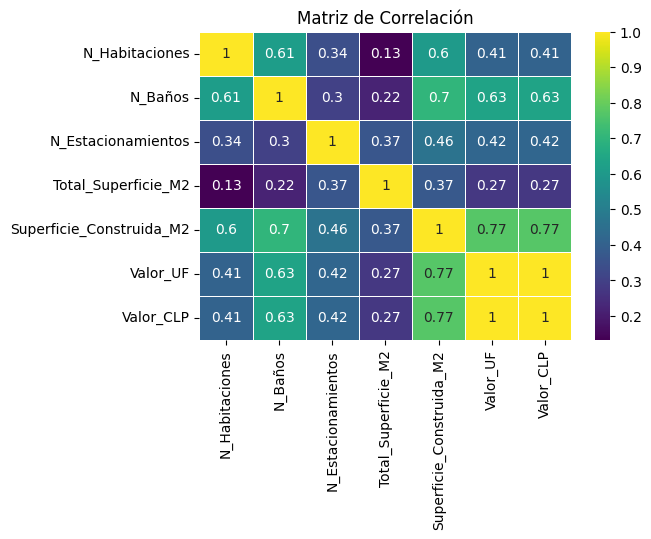

In [ ]:
# Convertir columnas a tipo numérico
df_viviendas_clean.loc[:, 'N_Habitaciones'] = pd.to_numeric(df_viviendas_clean['N_Habitaciones'], errors='coerce')
df_viviendas_clean.loc[:, 'N_Baños'] = pd.to_numeric(df_viviendas_clean['N_Baños'], errors='coerce')
df_viviendas_clean.loc[:, 'N_Estacionamientos'] = pd.to_numeric(df_viviendas_clean['N_Estacionamientos'], errors='coerce')
df_viviendas_clean.loc[:, 'Total_Superficie_M2'] = pd.to_numeric(df_viviendas_clean['Total_Superficie_M2'], errors='coerce')
df_viviendas_clean.loc[:, 'Superficie_Construida_M2'] = pd.to_numeric(df_viviendas_clean['Superficie_Construida_M2'], errors='coerce')
df_viviendas_clean.loc[:, 'Valor_UF'] = pd.to_numeric(df_viviendas_clean['Valor_UF'], errors='coerce')
df_viviendas_clean.loc[:, 'Valor_CLP'] = pd.to_numeric(df_viviendas_clean['Valor_CLP'], errors='coerce')

# Definir var_num_viviendas después de la conversión
var_num_viviendas = df_viviendas_clean[['N_Habitaciones', 'N_Baños', 'N_Estacionamientos', 'Total_Superficie_M2', 'Superficie_Construida_M2', 'Valor_UF', 'Valor_CLP']]

# Calcular la matriz de correlación
corr = var_num_viviendas.corr()

# Crear el mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='viridis', linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

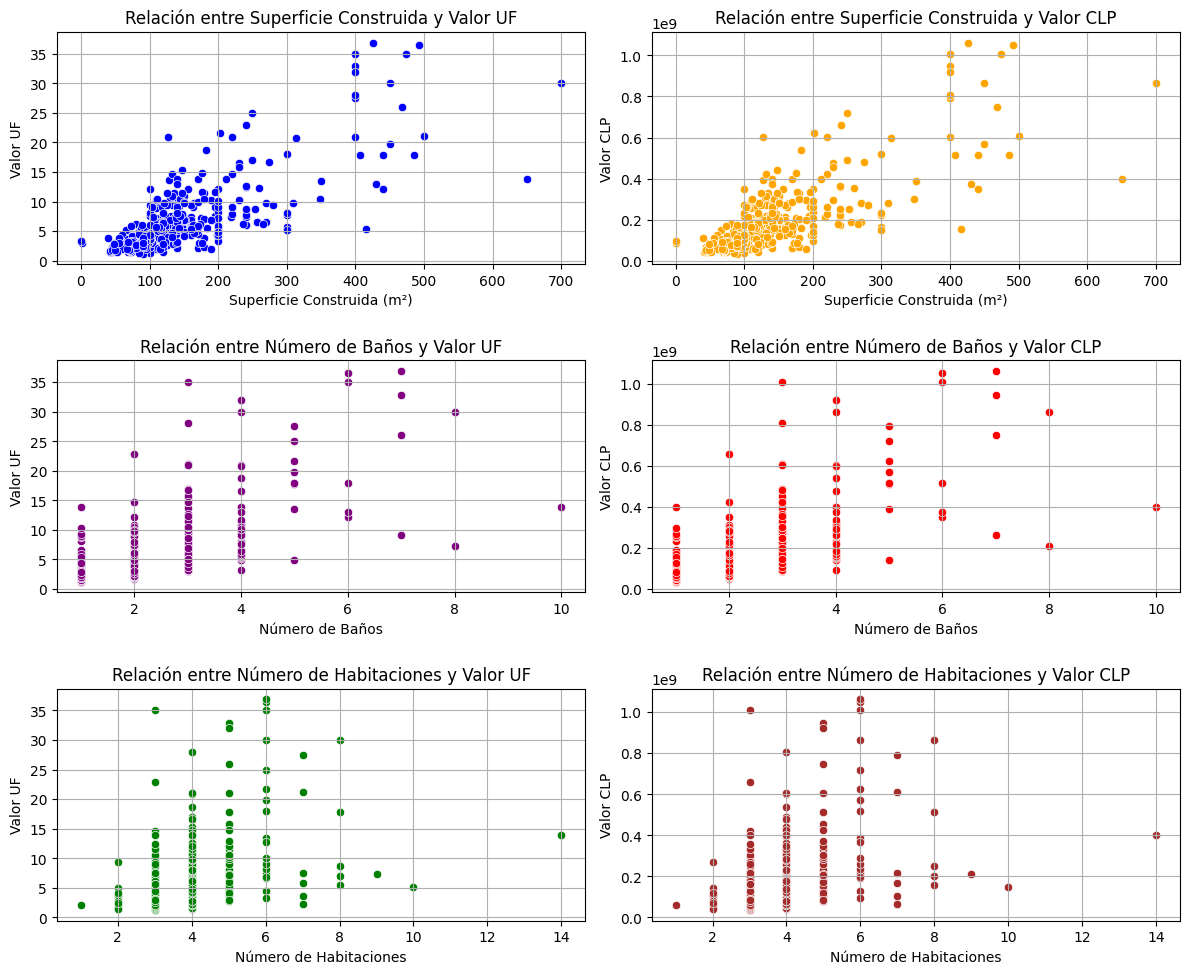

In [ ]:
# Visualizar la distribucion de los datos de las variables con mayor correlación

# Crear gráficos de dispersión para las variables
plt.figure(figsize=(12, 10))
# Gráfico 1: Relación entre superficie construida y valor UF
plt.subplot(3, 2, 1)
sns.scatterplot(x='Superficie_Construida_M2', y='Valor_UF', data=df_viviendas_clean, color='blue')
plt.title('Relación entre Superficie Construida y Valor UF')
plt.xlabel('Superficie Construida (m²)')
plt.ylabel('Valor UF')
plt.grid()

# Gráfico 2: Relación entre superficie construida y valor CLP
plt.subplot(3, 2, 2)
sns.scatterplot(x='Superficie_Construida_M2', y='Valor_CLP', data=df_viviendas_clean, color='orange')
plt.title('Relación entre Superficie Construida y Valor CLP')
plt.xlabel('Superficie Construida (m²)')
plt.ylabel('Valor CLP')
plt.grid()

# Gráfico 3: Relación entre número de baños y valor UF
plt.subplot(3, 2, 3)
sns.scatterplot(x='N_Baños', y='Valor_UF', data=df_viviendas_clean, color='purple')
plt.title('Relación entre Número de Baños y Valor UF')
plt.xlabel('Número de Baños')
plt.ylabel('Valor UF')
plt.grid()

# Gráfico 4: Relación entre número de baños y valor CLP
plt.subplot(3, 2, 4)
sns.scatterplot(x='N_Baños', y='Valor_CLP', data=df_viviendas_clean, color='red')
plt.title('Relación entre Número de Baños y Valor CLP')
plt.xlabel('Número de Baños')
plt.ylabel('Valor CLP')
plt.grid()

# Gráfico 5: Relación entre número de habitaciones y valor UF
plt.subplot(3, 2, 5)
sns.scatterplot(x='N_Habitaciones', y='Valor_UF', data=df_viviendas_clean, color='green')
plt.title('Relación entre Número de Habitaciones y Valor UF')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Valor UF')
plt.grid()

# Gráfico 6: Relación entre número de habitaciones y valor CLP
plt.subplot(3, 2, 6)
sns.scatterplot(x='N_Habitaciones', y='Valor_CLP', data=df_viviendas_clean, color='brown')
plt.title('Relación entre Número de Habitaciones y Valor CLP')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Valor CLP')
plt.grid()


plt.tight_layout()
plt.show()

**Interpretación**


*   Al analizar la correlación entre las variables en nuestro conjunto de datos, observamos que **Superficie_Construida_M2** y **Valor_UF** tienen una correlación positiva significativa de **0.77.** Esto sugiere que a medida que aumenta la superficie construida, también tiende a aumentar el valor en UF de las propiedades. Este hallazgo es relevante, ya que sugiere que las propiedades más grandes en términos de superficie construida tienen un mayor valor, lo que se alinea con las expectativas del mercado.
*   La relación entre **Valor_UF** y **Valor_CLP** también es notable, con una correlación de **1.0**, lo que indica una relación perfecta entre ambos. Esto sugiere que los cambios en el valor de la unidad de fomento (UF) impactan directamente en el valor en pesos chilenos (CLP), lo que es de esperarse en el contexto económico chileno.
*   Por otro lado, **N_Baños** y **N_Habitaciones** presentan una correlación de **0.61,** indicando que a medida que aumenta el número de habitaciones, también tiende a aumentar el número de baños. Este es un patrón lógico en el diseño de viviendas, donde propiedades con más habitaciones suelen tener más baños.
*   El análisis revela que **N_Estacionamientos** y **Superficie_Total_m2** tienen una correlación de **0.37,** sugiriendo que hay una relación moderada entre el número de estacionamientos y la superficie total. Esto podría indicar que las propiedades con más espacio tienden a ofrecer más estacionamientos, aunque la relación no es tan fuerte como en otros casos.
*  Además, **N_Habitaciones** y **Superficie_Construida_M2** tienen una correlación de **0.6,** lo que implica que a medida que aumenta el número de habitaciones, también se tiende a incrementar la superficie construida. Esto refuerza la idea de que propiedades con más habitaciones suelen ser más amplias.


# **7. Definir Datos de Entrenamiento y Prueba**

In [ ]:
# Definir las variables independientes (X) y la variable dependiente (y)

X = df_viviendas_clean[['N_Habitaciones', 'N_Baños', 'N_Estacionamientos', 'Total_Superficie_M2', 'Superficie_Construida_M2']]
y = df_viviendas_clean['Valor_UF']  # o 'Valor_CLP'


# Crear un nuevo DataFrame para mostrar X y y juntos
df_variables = pd.DataFrame(X)
df_variables['Valor_UF'] = y  # o 'Valor_CLP'

df_variables

,N_Habitaciones,N_Baños,N_Estacionamientos,Total_Superficie_M2,Superficie_Construida_M2,Valor_UF
0,5.0,6.0,3.0,5000.0,440.0,12.200
1,6.0,6.0,6.0,5000.0,430.0,13.000
4,3.0,2.0,3.0,5000.0,196.0,9.100
6,3.0,2.0,4.0,2600.0,140.0,9.850
11,6.0,5.0,2.0,5000.0,250.0,25.000
...,...,...,...,...,...,...
1086,4.0,2.0,2.0,350.0,89.0,6.076
1088,5.0,4.0,3.0,350.0,140.0,13.000
1090,5.0,5.0,4.0,5000.0,486.0,17.900
1116,5.0,3.0,2.0,190.0,111.0,10.500


In [ ]:
# Agregar una constante a las variables independientes para el modelo
X = sm.add_constant(X)  # Esto es necesario para la regresión lineal múltiple en statsmodels

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **8. Modelo de regresión lineal múltiple utilizando OLS (mínimos cuadrados ordinarios)**

Un modelo de **regresión lineal múltiple** es una herramienta estadística usada para analizar la relación entre una variable objetivo continua (llamada "destino") y múltiples variables predictoras. Estas variables predictoras pueden ser de diferentes tipos: continuas, categóricas o derivadas, lo que permite que el modelo maneje relaciones no lineales también.

El modelo se considera lineal porque cada predictor se multiplica por un coeficiente estimado y se suma al resto de los términos, incluyendo una constante (o intercepción). La regresión lineal se utiliza para descubrir patrones en datos que incluyen al menos dos variables continuas (una como destino y otra como predictor).

Además, se pueden usar predictores categóricos junto con variables continuas para ajustar el modelo. IBM Cognos Analytics, por ejemplo, aplica pruebas estadísticas, como la prueba F, para evaluar la significancia de estos modelos.

Ref. https://www.ibm.com/docs/es/cognos-analytics/11.1.0?topic=tests-multiple-linear-regression


Es el modelo más apropiado para mi proyecto. Ya que permite predecir una variable dependiente (precio en UF o CLP) utilizando múltiples variables independientes (número de habitaciones, número de baños, superficie total, superficie construida).


In [ ]:
# Añadir constante a las variables independientes (para obtener el intercepto)
# Esto representa el efecto que tiene cada variable independiente sobre la variable dependiente
# En otras palabras, cada coeficiente te dice en qué medida cambia la variable dependiente.
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Crear el modelo de regresión lineal múltiple
model = sm.OLS(y_train, X_train).fit()  # Usamos OLS para regresión lineal múltiple

In [ ]:
# Coeficientes del modelo
coeficientes = model.params  # Aquí obtienes los coeficientes (incluye el intercepto)

# El primer valor de coeficientes es el intercepto (constante)
intercepto = coeficientes[0]  # Esto asume que has añadido una constante antes en X_train

# Los demás coeficientes corresponden a las variables independientes
pendientes = coeficientes[1:]

# Imprimir los resultados
print("\nCoeficientes del modelo (pendientes):")
for var, coef in zip(X_train.columns[1:], pendientes):  # Evitar la columna constante
    print(f'{var}: {coef:.4f}')

print(f"Intercepto del modelo: {intercepto:.4f}")


Coeficientes del modelo (pendientes):
N_Habitaciones: -0.9096
N_Baños: 1.1886
N_Estacionamientos: 0.4026
Total_Superficie_M2: 0.0001
Superficie_Construida_M2: 0.0436
Intercepto del modelo: 0.0953


In [ ]:
# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

**MSE (Mean Squared Error - Error Cuadrático Medio):** Mide el promedio de los cuadrados de los errores, es decir, la diferencia entre los valores predichos y los valores reales.

Donde:

*  *y*i es el valor real
*  *y*^i es el valor predicho
*  n es el número total de observaciones.


Fórmula:

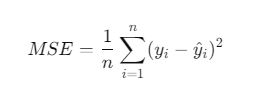

In [ ]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)

**MAE (Mean Absolute Error - Error Absoluto Medio):** Mide el promedio de las diferencias absolutas entre los valores reales y los valores predichos.

Fórmula:

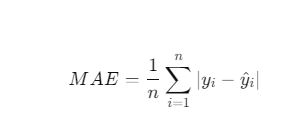

In [ ]:
# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

**R² (Coeficiente de Determinación):** Mide la proporción de la varianza total de la variable dependiente que es explicada por las variables independientes. El valor de **R²** varía entre 0 y 1, siendo 1 una predicción perfecta.

Donde 𝑦ˉes el valor promedio de los valores reales.

Fórmula:

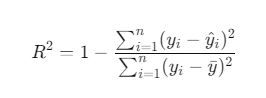

In [ ]:
# Calcular R^2
r2 = r2_score(y_test, y_pred)

In [ ]:

# Imprimir los resultados
print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Error Absoluto Medio (MAE): {mae:.2f}')
print(f'Coeficiente de Determinación (R^2): {r2:.2f}')

Error Cuadrático Medio (MSE): 15.21
Error Absoluto Medio (MAE): 2.62
Coeficiente de Determinación (R^2): 0.58


**El MAPE (Mean Absolute Percentage Error) *** es una métrica que se utiliza para medir la precisión de un modelo de predicción. Se calcula como el promedio del porcentaje absoluto de error entre las predicciones y los valores reales. El MAPE se expresa en porcentaje y es útil para entender cuán precisas son las predicciones en relación con los valores reales.

Donde:

*  *y*i son los valores reales
*  *y*^i son los valores predichos
*  n es el número total de observaciones.



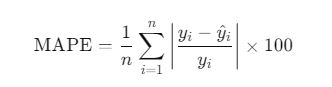

In [ ]:
# Calcular el MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calcular el MAPE para las predicciones
mape = calculate_mape(y_test, y_pred)

# Imprimir el resultado
print(f'MAPE: {mape:.2f}%')

MAPE: 46.40%


In [ ]:
# Calcular el RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE: {rmse:.2f}')

RMSE: 3.90


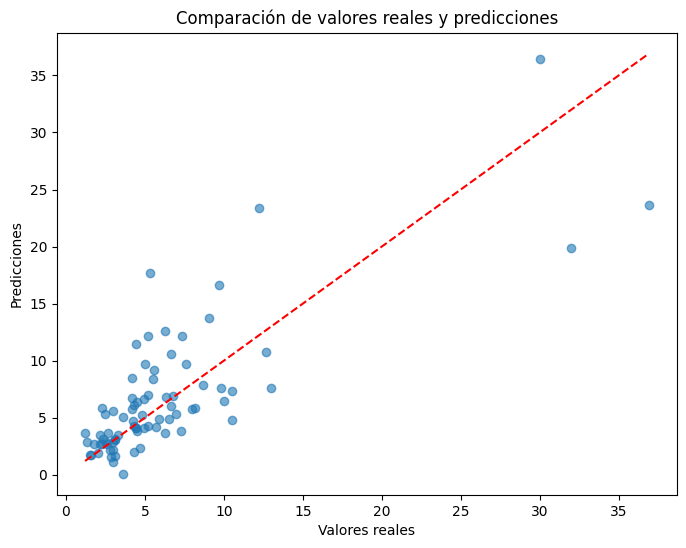

In [ ]:
# Graficar el Comparación de valores reales y predicciones

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación de valores reales y predicciones')
plt.show()

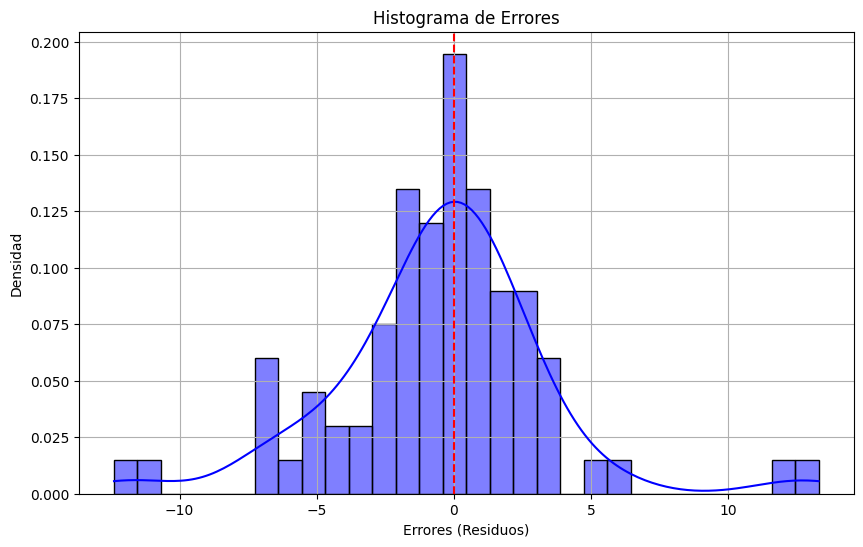

In [ ]:
# Calcular los errores (residuos)
errors = y_test - y_pred

# Graficar el histograma de errores
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True, color='blue', stat='density')
plt.title('Histograma de Errores')
plt.xlabel('Errores (Residuos)')
plt.ylabel('Densidad')
plt.axvline(0, color='red', linestyle='--')  # Línea vertical en 0
plt.grid()
plt.show()

**MODELO DE LASSO REGRESSION**

Lasso, o Least Absolute Shrinkage and Selection Operator, es un modelo lineal que penaliza el vector de coeficientes añadiendo su norma L1 a la función de coste. Esto genera coeficientes dispersos, donde muchos de ellos son cero, lo que significa que el modelo ignora ciertas características predictivas. Esta propiedad permite realizar una selección automática de características, resultando en un modelo más simple y fácil de interpretar, al resaltar las características más relevantes.

Si las características predictivas están correlacionadas, Lasso tiende a seleccionar una de ellas al azar. Por lo tanto, aunque Ridge es una buena opción general, Lasso puede ofrecer mejores resultados si se sospecha que los datos dependen de un subconjunto específico de características.

ref.https://interactivechaos.com/es/manual/tutorial-de-machine-learning/regresion-lasso

In [ ]:

# Crear el modelo Lasso
lasso_model = Lasso(alpha=0.1)  # Ajusta el valor de alpha según sea necesario

# Entrenar el modelo Lasso
lasso_model.fit(X_train, y_train)

# Hacer predicciones
lasso_predictions = lasso_model.predict(X_test)

# Calcular métricas para Lasso
lasso_mape = mean_absolute_percentage_error(y_test, lasso_predictions)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))

print(f'Lasso Regression MAPE: {lasso_mape:.2f}%, RMSE: {lasso_rmse:.2f}')

Lasso Regression MAPE: 0.46%, RMSE: 3.93


**VALIDACIÓN CRUZADA**

Es una técnica para evaluar modelos de aprendizaje automático (ML) al entrenar múltiples modelos en subconjuntos de los datos disponibles y evaluarlos con el conjunto de datos complementario. Esta técnica es útil para detectar el sobreajuste, que ocurre cuando un modelo no puede generalizar patrones a nuevos datos. La validación cruzada ayuda a asegurar que el modelo sea robusto y se desempeñe bien en datos no vistos, proporcionando una estimación más precisa de su rendimiento.

ref https://docs.aws.amazon.com/es_es/machine-learning/latest/dg/cross-validation.html

In [ ]:
# Crear el modelo Lasso
lasso_model = Lasso(alpha=0.1)

# Realizar la validación cruzada
lasso_cv_scores = cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')

# Convertir a positivos ya que `cross_val_score` devuelve valores negativos
lasso_cv_scores = -lasso_cv_scores

# Imprimir los resultados
print(f'Lasso Regression MAPE (validación cruzada): {lasso_cv_scores.mean():.2f}%, Desviación estándar: {lasso_cv_scores.std():.2f}')

Lasso Regression MAPE (validación cruzada): 0.43%, Desviación estándar: 0.10


**MODELO DE RIDGE REGRESSION**

El modelo de regresión Ridge es una técnica de análisis de regresión que se utiliza para abordar problemas de multicolinealidad (cuando las variables predictivas están altamente correlacionadas) y para evitar el sobreajuste del modelo. Se basa en la regresión lineal, pero añade un término de penalización a la función de coste, que es la norma L2 del vector de coeficientes.

**Aplicaciones**

La regresión Ridge es especialmente útil en contextos donde hay muchas variables predictivas o donde algunas de ellas son redundantes. Es común en campos como la economía, la biología y el aprendizaje automático, donde se manejan grandes conjuntos de datos con interacciones complejas entre las variables.

ref https://interactivechaos.com/es/manual/tutorial-de-machine-learning/regresion-ridge

In [ ]:
# Crear el modelo Ridge
ridge_model = Ridge(alpha=0.1)  # Ajusta el valor de alpha según sea necesario

# Entrenar el modelo Ridge
ridge_model.fit(X_train, y_train)

# Hacer predicciones
ridge_predictions = ridge_model.predict(X_test)

# Calcular métricas para Ridge
ridge_mape = mean_absolute_percentage_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))

print(f'Ridge Regression MAPE: {ridge_mape:.2f}%, RMSE: {ridge_rmse:.2f}')

Ridge Regression MAPE: 0.46%, RMSE: 3.90


# **9. RESULTADOS Y MÉTRICAS**

**1. Modelo de Regresión Lineal Múltiple (OLS):**


*   **R^2 = 0.58:**  Esto indica que el modelo explica aproximadamente el 58% de la variabilidad en los precios de las viviendas, lo que sugiere que hay margen para mejorar.
*   **MSE y RMSE:** Un MSE de 15.21 y un RMSE de 3.90 son valores que, aunque dan una idea de la precisión del modelo, muestran que todavía hay errores en las predicciones. Un RMSE más bajo es preferible, así que la mejora del modelo sería beneficiosa.

**2. Modelo de Lasso Regression:**

*   **MAPE (0.46%) y RMSE (3.93):**  Estos resultados son bastante prometedores, indicando que el modelo Lasso proporciona predicciones más precisas que el modelo OLS, a pesar de que el RMSE es similar.
*   **MSE y RMSE:** Un MAPE de 0.43% en validación cruzada con una desviación estándar de 0.10 sugiere que el modelo Lasso tiene una buena capacidad de generalización y es robusto ante datos nuevos.

**2. Modelo de Lasso Regression:**

*   **MAPE (0.46%) y RMSE (3.93):**  Estos resultados son bastante prometedores, indicando que el modelo Lasso proporciona predicciones más precisas que el modelo OLS, a pesar de que el RMSE es similar.
*   **MSE y RMSE:** Un MAPE de 0.43% en validación cruzada con una desviación estándar de 0.10 sugiere que el modelo Lasso tiene una buena capacidad de generalización y es robusto ante datos nuevos.

**3. Modelo de Ridge Regression:**

*   Los resultados son similares a los del modelo Lasso, con un MAPE de 0.46% y RMSE de 3.90. Esto indica que el modelo Ridge también es efectivo, pero no mejora significativamente el rendimiento respecto al Lasso..



# **10. CONCLUSIONES**

Basándose en el rendimiento, el **modelo de Lasso** parece ser el más adecuado para el proyecto, dado su bajo **MAPE** y su buena capacidad de validación cruzada. Esto sugiere que tiene una mejor capacidad para manejar el sobreajuste, lo que es crucial en modelos de regresión con múltiples variables.